In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import collections

In [55]:
plays = pd.read_csv('pbp-2021.csv')
plays = plays[['Quarter', 'Minute', 'Second', 'Yards', 'PlayType']] # variables needed to examine the efficacy of runs vs passes

In [56]:
plays = plays.dropna() # drop null values
plays = plays.reset_index(drop=True)

In [57]:
# filter dataset to include  4th quarter plays
for i in range(len(plays['Quarter'])):
    if plays.loc[i, 'Quarter'] != 4:
        plays = plays.drop([i])
plays = plays.reset_index(drop=True)

In [58]:
# filter to the last 6 minutes of play
for i in range(len(plays['Minute'])):
    if plays.loc[i, 'Minute'] >= 6:
        plays = plays.drop([i])
plays = plays.reset_index(drop=True)

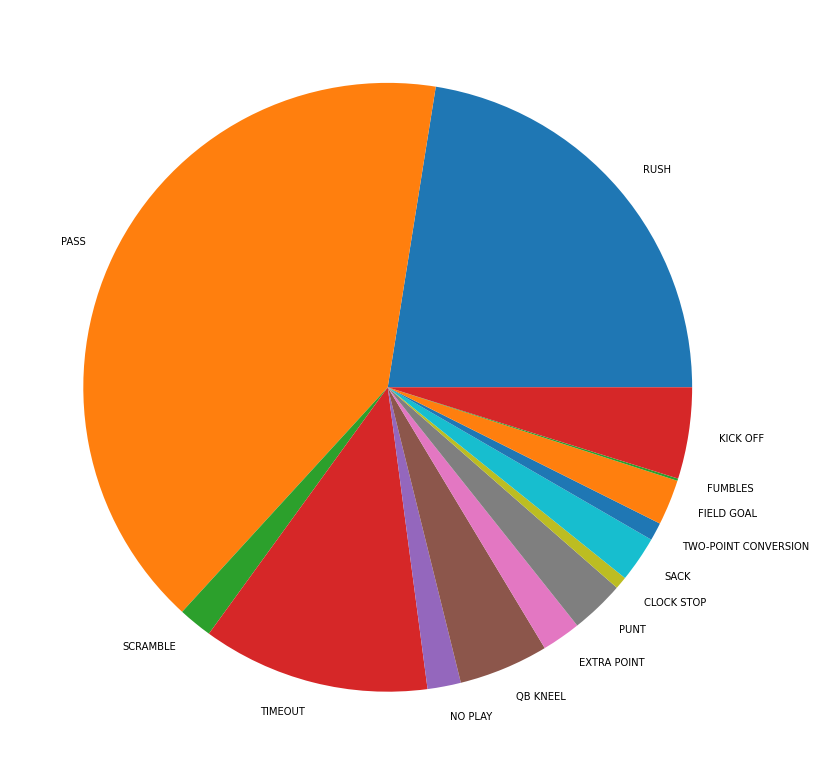

In [59]:
# filter out exceptions
for i in range(len(plays['PlayType'])):
    if plays.loc[i, 'PlayType'] == 'EXCEPTION':
        plays = plays.drop([i])
plays = plays.reset_index(drop=True)

# create a pie chart breakdown of the different types of plays
play_frequency = collections.Counter(plays['PlayType'])
play_types = list(play_frequency.keys())
frequencies = list(play_frequency.values())

fig = plt.figure(figsize =(20, 14))
plt.pie(frequencies, labels=play_types)

plt.show()

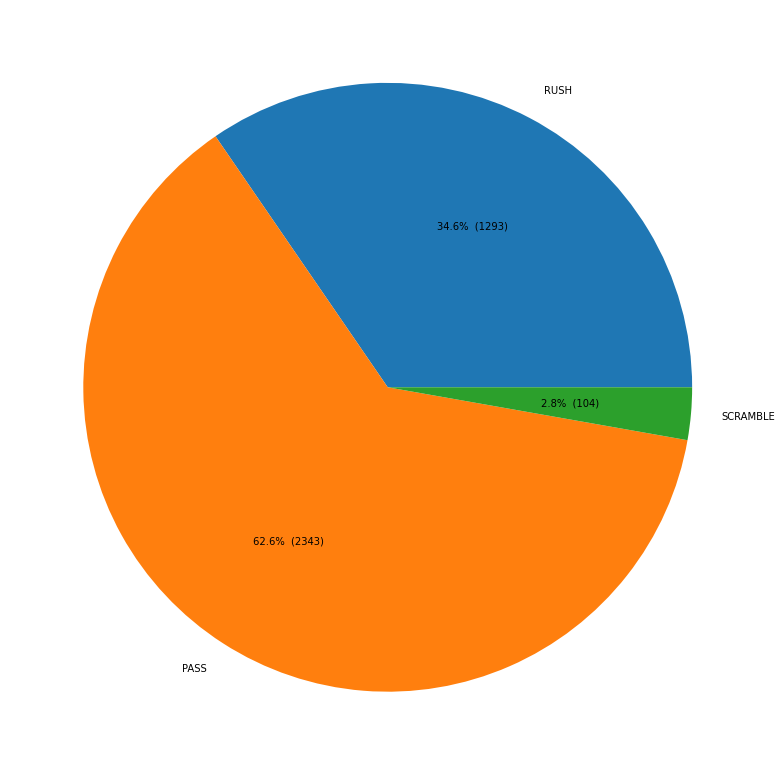

In [60]:
# filter down to runs, passes, and scrambles

# filter out exceptions
for i in range(len(plays['PlayType'])):
    if plays.loc[i, 'PlayType'] != 'RUSH' and plays.loc[i, 'PlayType'] != 'PASS' and plays.loc[i, 'PlayType'] != 'SCRAMBLE':
        plays = plays.drop([i])
plays = plays.reset_index(drop=True)

# create a pie chart breakdown of the different types of plays
play_frequency = collections.Counter(plays['PlayType'])
play_types = list(play_frequency.keys())
frequencies = list(play_frequency.values())

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig = plt.figure(figsize =(20, 14))
plt.pie(frequencies, labels=play_types, autopct=make_autopct(frequencies))

plt.show()

In [61]:
plays.to_csv('late_game_plays') # download csv
plays

,Quarter,Minute,Second,Yards,PlayType
0,4,4,53,3,RUSH
1,4,1,33,1,RUSH
2,4,1,39,0,PASS
3,4,1,29,0,PASS
4,4,3,58,9,SCRAMBLE
...,...,...,...,...,...
3735,4,1,30,27,PASS
3736,4,2,0,1,RUSH
3737,4,2,39,7,RUSH
3738,4,3,23,-1,RUSH


In [62]:
# examine what types of plays are used at different times in the last 6 minutes

# split the play times into 30 second increments
plays['Minutes'] = plays['Minute'] * 60 + plays['Second']
plays['Minutes'] = pd.cut(plays['Minutes'],
                          bins=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360],
                          labels=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])

# count the number of passes for each of the 30 second segments
num_passes = [0] * 12
for i in range(len(plays['PlayType'])):
    if plays.iloc[i]['PlayType'] == "PASS":
        index = int(plays.iloc[i]['Minutes'] * 2)
        num_passes[index] += 1
num_passes.reverse()

# count the number of runs for each of the 30 second segments
num_runs = [0] * 12
for i in range(len(plays['PlayType'])):
    if plays.iloc[i]['PlayType'] == "RUSH":
        index = int(plays.iloc[i]['Minutes'] * 2)
        num_runs[index] += 1
num_runs.reverse()

# count the number of scrambles for each of the 30 second segments
num_scrambles = [0] * 12
for i in range(len(plays['PlayType'])):
    if plays.iloc[i]['PlayType'] == "SCRAMBLE":
        index = int(plays.iloc[i]['Minutes'] * 2)
        num_scrambles[index] += 1
num_scrambles.reverse()

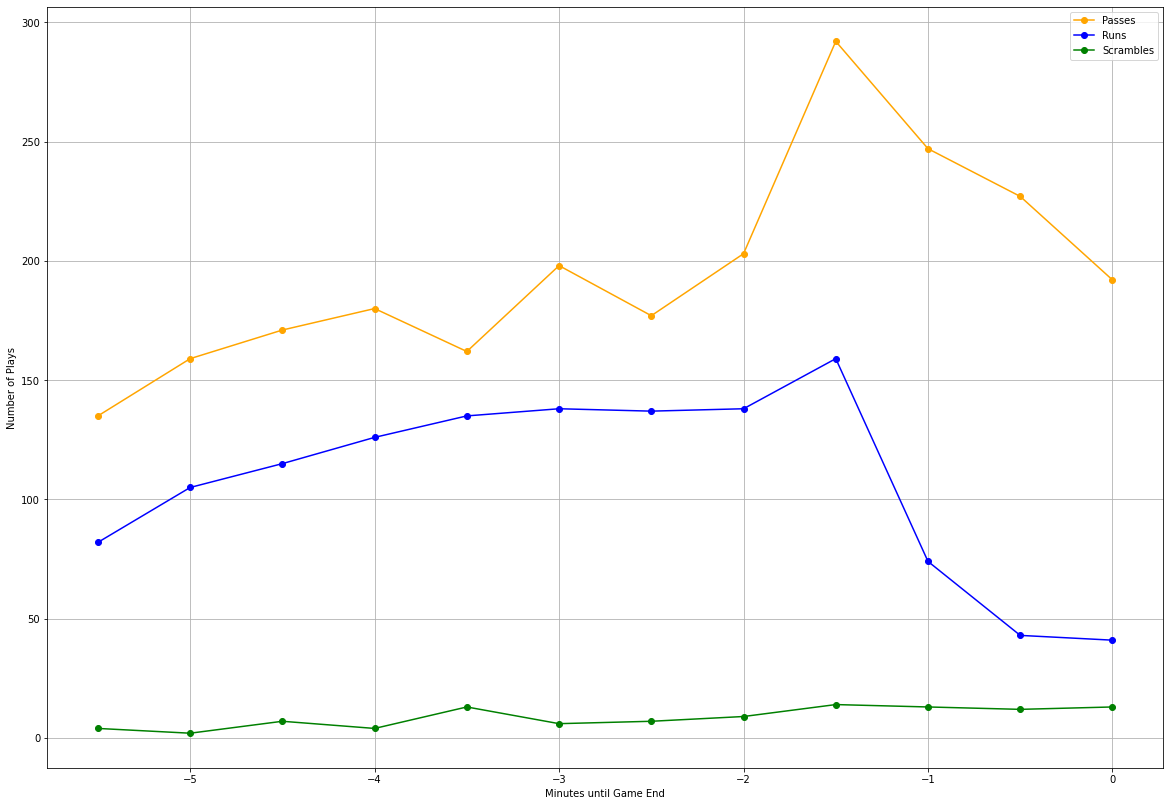

In [63]:
# plot a chart with the frequency of each play type throughout each of the 30 second segments

x_axis = [-5.5, -5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0]

plt.figure(figsize=(20,14))
plt.plot(x_axis, num_passes, label='Passes', color='orange', marker='o')
plt.plot(x_axis, num_runs, label='Runs', color='blue', marker='o')
plt.plot(x_axis, num_scrambles, label='Scrambles', color='green', marker='o')
plt.xlabel('Minutes until Game End')
plt.ylabel('Number of Plays')
plt.legend()
plt.grid(True)

plt.show()

In [64]:
# determine efficacy of passes vs runs

# make a dataset of all passing plays
passes = pd.DataFrame(columns=list(plays.columns))
for i in range(len(plays['PlayType'])):
    if plays.iloc[i]['PlayType'] == "PASS":
        passes = passes.append(plays.loc[i], ignore_index=True)

# make a dataset of all running plays
runs = pd.DataFrame(columns=list(plays.columns))
for i in range(len(plays['PlayType'])):
    if plays.iloc[i]['PlayType'] == "RUSH":
        runs = runs.append(plays.loc[i], ignore_index=True)

# make a dataset of all scramble plays
scrambles = pd.DataFrame(columns=list(plays.columns))
for i in range(len(plays['PlayType'])):
    if plays.iloc[i]['PlayType'] == "SCRAMBLE":
        scrambles = scrambles.append(plays.loc[i], ignore_index=True)

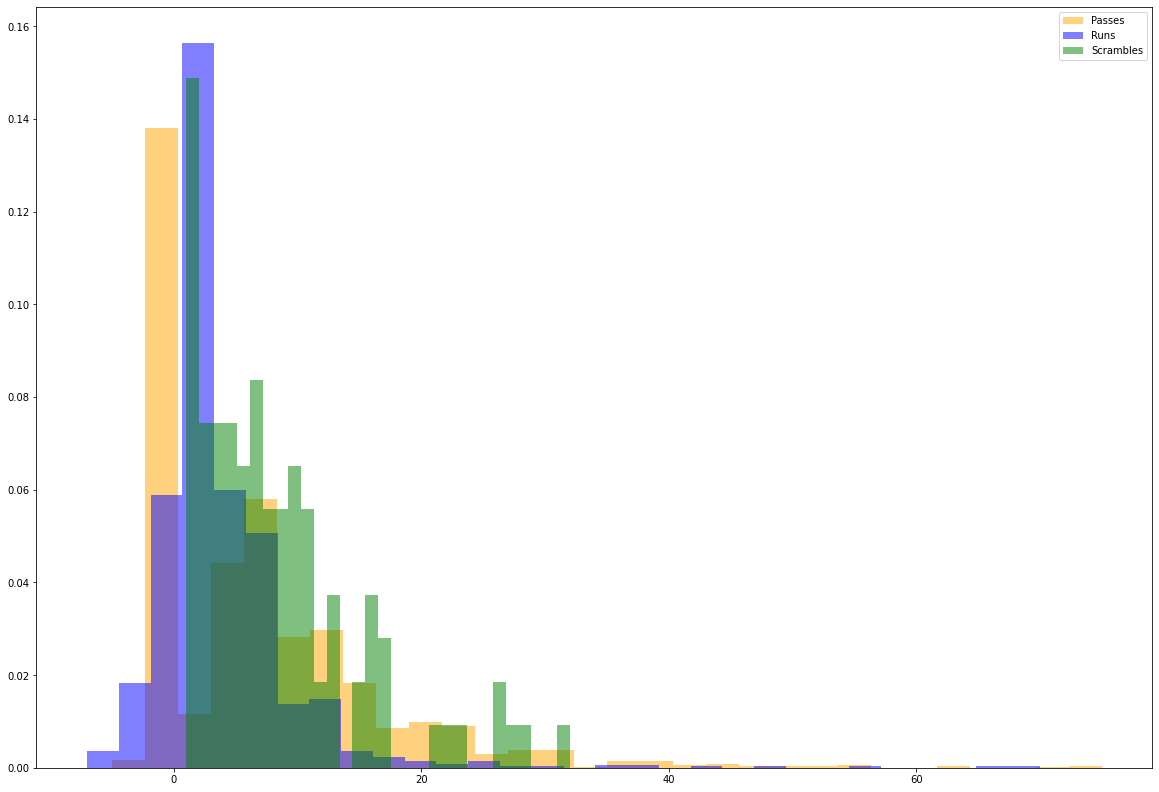

In [65]:
# graph the distribution of passes and runs
plt.figure(figsize=(20,14))

plt.hist(passes['Yards'], alpha=0.5, density=True, stacked=True, bins=30, color='orange', label='Passes')
plt.hist(runs['Yards'], alpha=0.5, density=True, stacked=True, bins=30, color='blue', label='Runs')
plt.hist(scrambles['Yards'], alpha=0.5, density=True, stacked=True, bins=30, color='green', label='Scrambles')
plt.legend()

plt.show()

In [66]:
print("The average passing play yields: %.2f yards" %(passes['Yards'].mean()), end=' ')
print("with a standard deviation of %.2f yards" %(np.std(passes['Yards'])))

print("The average running play yields: %.1f yards" %(runs['Yards'].mean()), end=' ')
print("with a standard deviation of %.1f yards" %(np.std(runs['Yards'])))

print("The average scramble play yields: %.1f yards" %(scrambles['Yards'].mean()), end=' ')
print("with a standard deviation of %.1f yards" %(np.std(scrambles['Yards'])))

The average passing play yields: 7.12 yards with a standard deviation of 9.12 yards
The average running play yields: 3.8 yards with a standard deviation of 5.8 yards
The average scramble play yields: 8.5 yards with a standard deviation of 6.6 yards


#  Comparing Pass Types


In [67]:
# determine the efficacy of different types of passes (location of receiver)

plays = pd.read_csv('pbp-2021.csv')
plays = plays[['Quarter', 'Minute', 'Second', 'Yards', 'PlayType', 'PassType']] # variables needed to examine the efficacy of passes

In [68]:
plays = plays.dropna() # drop null values
plays = plays.reset_index(drop=True)

In [69]:
# filter dataset to include  4th quarter plays
for i in range(len(plays['Quarter'])):
    if plays.loc[i, 'Quarter'] != 4:
        plays = plays.drop([i])
plays = plays.reset_index(drop=True)

In [70]:
# filter to the last 6 minutes of play
for i in range(len(plays['Minute'])):
    if plays.loc[i, 'Minute'] >= 6:
        plays = plays.drop([i])
plays = plays.reset_index(drop=True)

In [71]:
# filter down to just passing plays
for i in range(len(plays['PlayType'])):
    if plays.loc[i, 'PlayType'] != 'PASS':
        plays = plays.drop([i])
passes = plays.reset_index(drop=True)

# filter down to 6 catagories (deep and short + right, left, and middle)
for i in range(len(passes['PassType'])):
    if not passes.loc[i, 'PassType'] in ['SHORT LEFT', 'SHORT MIDDLE', 'SHORT RIGHT', 'DEEP LEFT', 'DEEP MIDDLE', 'DEEP RIGHT']:
        passes = passes.drop([i])
passes = passes.reset_index(drop=True)

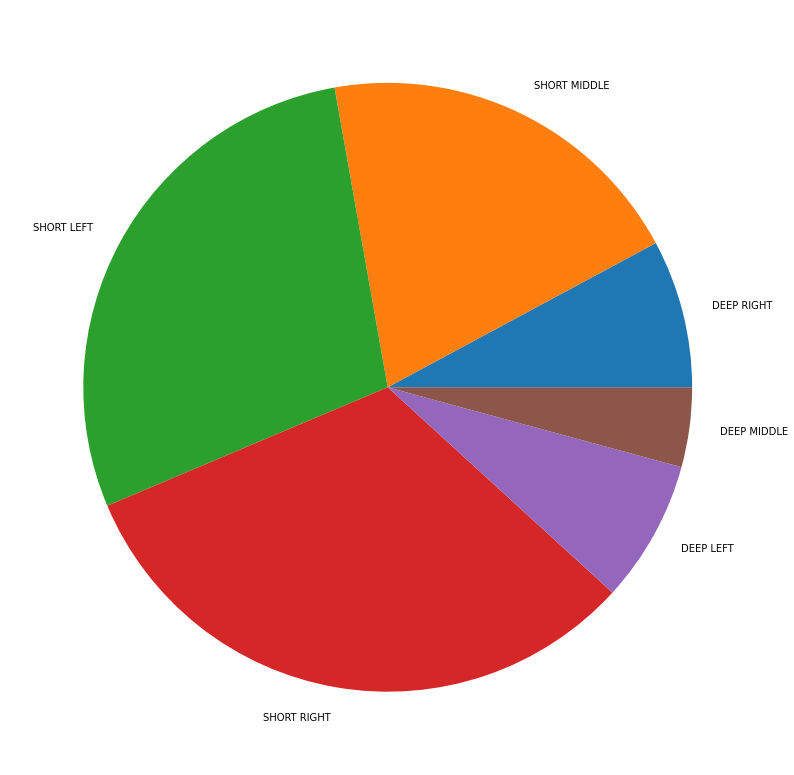

In [72]:
# create a pie chart breakdown of the different types of plays
play_frequency = collections.Counter(passes['PassType'])
play_types = list(play_frequency.keys())
frequencies = list(play_frequency.values())

fig = plt.figure(figsize =(20, 14))
plt.pie(frequencies, labels=play_types)

plt.show()

In [73]:
# determine efficacy of the 6 different types of passes

# make a dataset of all 6 passing plays
short_left = pd.DataFrame(columns=list(passes.columns))
for i in range(len(passes['PassType'])):
    if passes.iloc[i]['PassType'] == "SHORT LEFT":
        short_left = short_left.append(passes.loc[i], ignore_index=True)

short_middle = pd.DataFrame(columns=list(passes.columns))
for i in range(len(passes['PassType'])):
    if passes.iloc[i]['PassType'] == "SHORT MIDDLE":
        short_middle = short_middle.append(passes.loc[i], ignore_index=True)

short_right = pd.DataFrame(columns=list(passes.columns))
for i in range(len(passes['PassType'])):
    if passes.iloc[i]['PassType'] == "SHORT RIGHT":
        short_right = short_right.append(passes.loc[i], ignore_index=True)

deep_left = pd.DataFrame(columns=list(passes.columns))
for i in range(len(passes['PassType'])):
    if passes.iloc[i]['PassType'] == "DEEP LEFT":
        deep_left = deep_left.append(passes.loc[i], ignore_index=True)

deep_middle = pd.DataFrame(columns=list(passes.columns))
for i in range(len(passes['PassType'])):
    if passes.iloc[i]['PassType'] == "DEEP MIDDLE":
        deep_middle = deep_middle.append(passes.loc[i], ignore_index=True)

deep_right = pd.DataFrame(columns=list(passes.columns))
for i in range(len(passes['PassType'])):
    if passes.iloc[i]['PassType'] == "DEEP RIGHT":
        deep_right = deep_right.append(passes.loc[i], ignore_index=True)

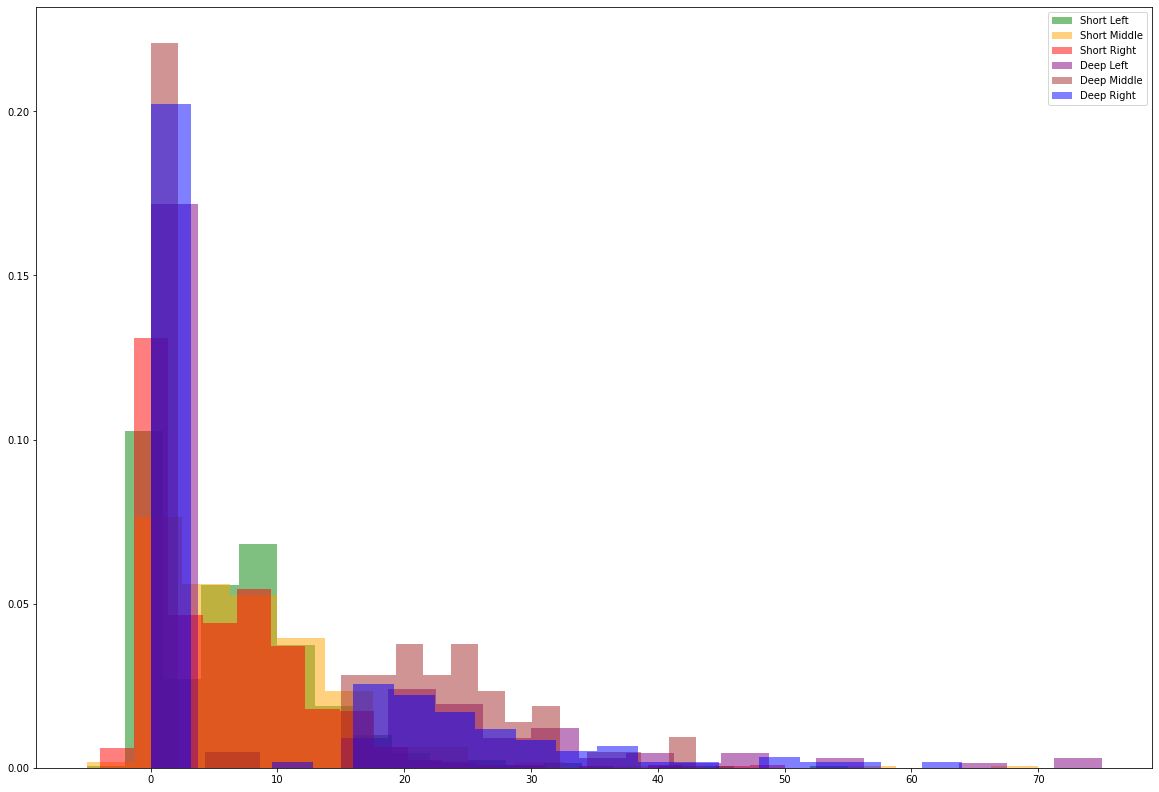

In [74]:
# graph the distribution of passes
plt.figure(figsize=(20,14))

plt.hist(short_left['Yards'], alpha=0.5, density=True, stacked=True, bins=20, color='green', label='Short Left')
plt.hist(short_middle['Yards'], alpha=0.5, density=True, stacked=True, bins=20, color='orange', label='Short Middle')
plt.hist(short_right['Yards'], alpha=0.5, density=True, stacked=True, bins=20, color='red', label='Short Right')
plt.hist(deep_left['Yards'], alpha=0.5, density=True, stacked=True, bins=20, color='purple', label='Deep Left')
plt.hist(deep_middle['Yards'], alpha=0.5, density=True, stacked=True, bins=20, color='brown', label='Deep Middle')
plt.hist(deep_right['Yards'], alpha=0.5, density=True, stacked=True, bins=20, color='blue', label='Deep Right')
plt.legend()

plt.show()

In [75]:
print("The average short left pass yields: %.2f yards" %(short_left['Yards'].mean()), end=' ')
print("with a standard deviation of %.2f yards" %(np.std(short_left['Yards'])))

print("The average short middle pass yields: %.2f yards" %(short_middle['Yards'].mean()), end=' ')
print("with a standard deviation of %.2f yards" %(np.std(short_middle['Yards'])))

print("The average short right pass yields: %.2f yards" %(short_right['Yards'].mean()), end=' ')
print("with a standard deviation of %.2f yards" %(np.std(short_right['Yards'])))

print("The average deep left pass yields: %.2f yards" %(deep_left['Yards'].mean()), end=' ')
print("with a standard deviation of %.2f yards" %(np.std(deep_left['Yards'])))

print("The average deep middle pass yields: %.2f yards" %(deep_middle['Yards'].mean()), end=' ')
print("with a standard deviation of %.2f yards" %(np.std(deep_middle['Yards'])))

print("The average deep right pass yields: %.2f yards" %(deep_right['Yards'].mean()), end=' ')
print("with a standard deviation of %.2f yards" %(np.std(deep_right['Yards'])))

The average short left pass yields: 6.20 yards with a standard deviation of 6.49 yards
The average short middle pass yields: 7.32 yards with a standard deviation of 7.62 yards
The average short right pass yields: 5.76 yards with a standard deviation of 6.71 yards
The average deep left pass yields: 10.38 yards with a standard deviation of 16.05 yards
The average deep middle pass yields: 12.34 yards with a standard deviation of 12.78 yards
The average deep right pass yields: 9.45 yards with a standard deviation of 14.13 yards


In [76]:
# remove incomplete passes/sacks
passes = passes.reset_index(drop=True)
for i in range(len(passes['Yards'])):
    if passes['Yards'][i] <= 0:
        passes = passes.drop([i])
passes = passes.reset_index(drop=True)

In [77]:
# determine efficacy of the 6 different types of passes w/o incompletes/sacks

# make a dataset of all 6 passing plays
short_left = pd.DataFrame(columns=list(passes.columns))
for i in range(len(passes['PassType'])):
    if passes.iloc[i]['PassType'] == "SHORT LEFT":
        short_left = short_left.append(passes.loc[i], ignore_index=True)

short_middle = pd.DataFrame(columns=list(passes.columns))
for i in range(len(passes['PassType'])):
    if passes.iloc[i]['PassType'] == "SHORT MIDDLE":
        short_middle = short_middle.append(passes.loc[i], ignore_index=True)

short_right = pd.DataFrame(columns=list(passes.columns))
for i in range(len(passes['PassType'])):
    if passes.iloc[i]['PassType'] == "SHORT RIGHT":
        short_right = short_right.append(passes.loc[i], ignore_index=True)

deep_left = pd.DataFrame(columns=list(passes.columns))
for i in range(len(passes['PassType'])):
    if passes.iloc[i]['PassType'] == "DEEP LEFT":
        deep_left = deep_left.append(passes.loc[i], ignore_index=True)

deep_middle = pd.DataFrame(columns=list(passes.columns))
for i in range(len(passes['PassType'])):
    if passes.iloc[i]['PassType'] == "DEEP MIDDLE":
        deep_middle = deep_middle.append(passes.loc[i], ignore_index=True)

deep_right = pd.DataFrame(columns=list(passes.columns))
for i in range(len(passes['PassType'])):
    if passes.iloc[i]['PassType'] == "DEEP RIGHT":
        deep_right = deep_right.append(passes.loc[i], ignore_index=True)

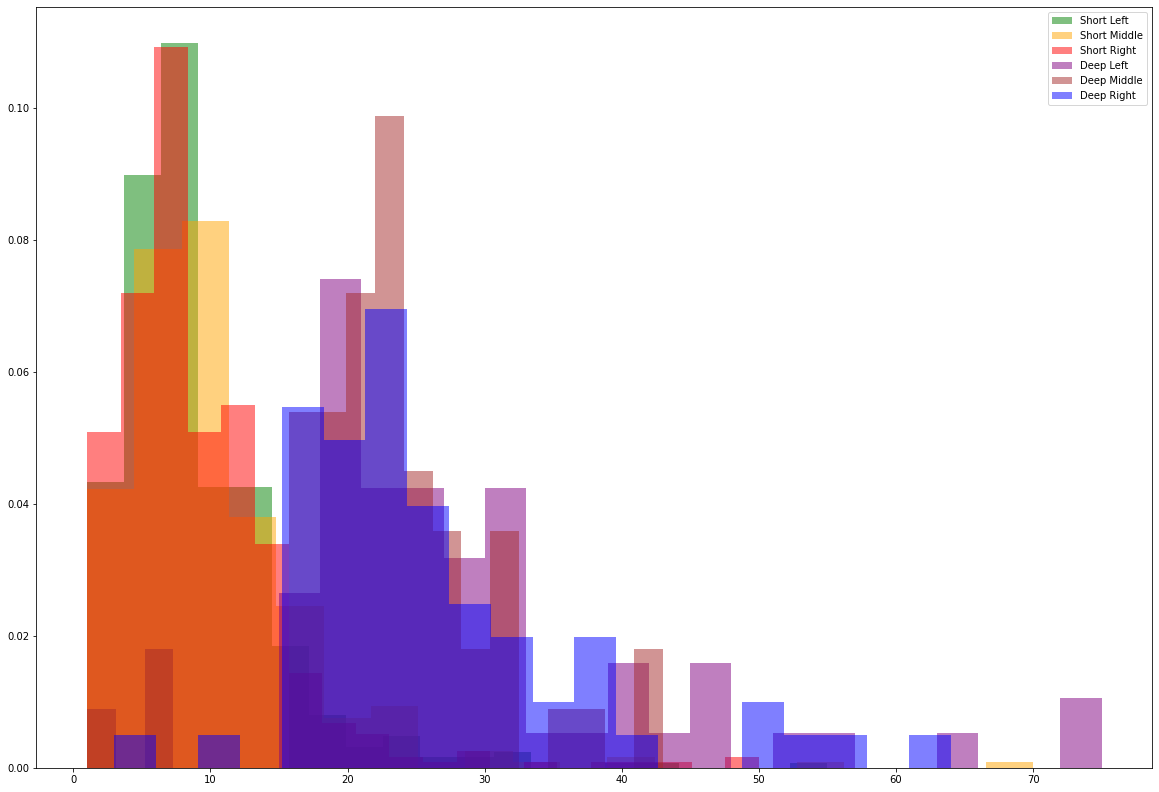

In [78]:
# graph the distribution of passes w/o incompletes/sacks
plt.figure(figsize=(20,14))

plt.hist(short_left['Yards'], alpha=0.5, density=True, stacked=True, bins=20, color='green', label='Short Left')
plt.hist(short_middle['Yards'], alpha=0.5, density=True, stacked=True, bins=20, color='orange', label='Short Middle')
plt.hist(short_right['Yards'], alpha=0.5, density=True, stacked=True, bins=20, color='red', label='Short Right')
plt.hist(deep_left['Yards'], alpha=0.5, density=True, stacked=True, bins=20, color='purple', label='Deep Left')
plt.hist(deep_middle['Yards'], alpha=0.5, density=True, stacked=True, bins=20, color='brown', label='Deep Middle')
plt.hist(deep_right['Yards'], alpha=0.5, density=True, stacked=True, bins=20, color='blue', label='Deep Right')
plt.legend()

plt.show()

In [79]:
print("Averages without incomplete passes/sacks: ")

print("The average short left pass yields: %.2f yards" %(short_left['Yards'].mean()), end=' ')
print("with a standard deviation of %.2f yards" %(np.std(short_left['Yards'])))

print("The average short middle pass yields: %.2f yards" %(short_middle['Yards'].mean()), end=' ')
print("with a standard deviation of %.2f yards" %(np.std(short_middle['Yards'])))

print("The average short right pass yields: %.2f yards" %(short_right['Yards'].mean()), end=' ')
print("with a standard deviation of %.2f yards" %(np.std(short_right['Yards'])))

print("The average deep left pass yields: %.2f yards" %(deep_left['Yards'].mean()), end=' ')
print("with a standard deviation of %.2f yards" %(np.std(deep_left['Yards'])))

print("The average deep middle pass yields: %.2f yards" %(deep_middle['Yards'].mean()), end=' ')
print("with a standard deviation of %.2f yards" %(np.std(deep_middle['Yards'])))

print("The average deep right pass yields: %.2f yards" %(deep_right['Yards'].mean()), end=' ')
print("with a standard deviation of %.2f yards" %(np.std(deep_right['Yards'])))

Averages without incomplete passes/sacks: 
The average short left pass yields: 9.00 yards with a standard deviation of 5.97 yards
The average short middle pass yields: 10.00 yards with a standard deviation of 7.21 yards
The average short right pass yields: 9.00 yards with a standard deviation of 6.31 yards
The average deep left pass yields: 29.17 yards with a standard deviation of 13.23 yards
The average deep middle pass yields: 23.06 yards with a standard deviation of 7.61 yards
The average deep right pass yields: 26.35 yards with a standard deviation of 10.55 yards
